In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras import initializers
from tensorflow.keras.layers import BatchNormalization

In [40]:
X,y=make_circles(n_samples=400,noise=0.04,random_state=2)

In [41]:
import matplotlib.pyplot as plt

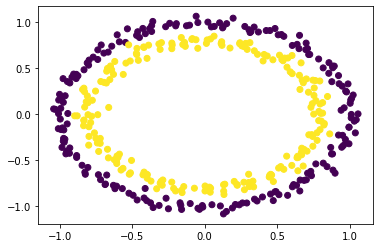

In [42]:
plt.scatter(X[:,0],X[:,1],c=y[:])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [45]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

# **Model1 is used withour normalization for classification task**

In [46]:
model1=Sequential()
model1.add(Dense(8,activation='relu',kernel_initializer='he_normal',input_dim=2))
model1.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_normal'))
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 8)                 24        
                                                                 
 dense_42 (Dense)            (None, 8)                 72        
                                                                 
 dense_43 (Dense)            (None, 8)                 72        
                                                                 
 dense_44 (Dense)            (None, 8)                 72        
                                                                 
 dense_45 (Dense)            (None, 8)                 72        
                                                                 
 dense_46 (Dense)            (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable

In [47]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
history1=model1.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=30)

Epoch 1/100
11/11 [==============================] - 1s 19ms/step - loss: 0.7154 - accuracy: 0.4812 - val_loss: 0.7219 - val_accuracy: 0.4625
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7052 - accuracy: 0.4844 - val_loss: 0.7098 - val_accuracy: 0.4750
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 0.7007 - accuracy: 0.4469 - val_loss: 0.7006 - val_accuracy: 0.4625
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.4938 - val_loss: 0.6966 - val_accuracy: 0.4750
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5094 - val_loss: 0.6936 - val_accuracy: 0.4750
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.4688 - val_loss: 0.6906 - val_accuracy: 0.5375
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.4906 - val_loss: 0.6891 - val_accuracy: 0.5375
Epoch 8/100


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


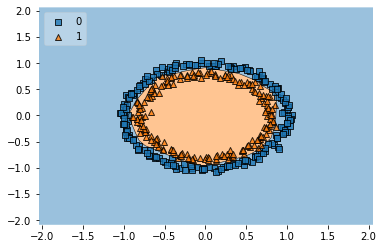

In [49]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model1,legend=2)

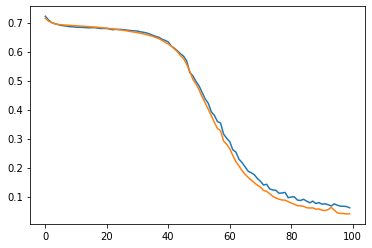

In [50]:
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['loss'])
plt.show()

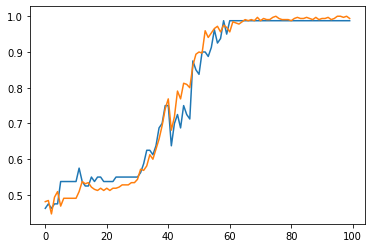

In [51]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['accuracy'])
plt.show()

## **Model2 is used for the with Batch_normalization and it will converge faster than without batch_normalization**

In [52]:
model2=Sequential()
model2.add(Dense(8,activation='relu',kernel_initializer='he_normal',input_dim=2))
model2.add(BatchNormalization())
model2.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dense(8,activation='relu',kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_normal'))
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 8)                 24        
                                                                 
 batch_normalization_6 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_48 (Dense)            (None, 8)                 72        
                                                                 
 batch_normalization_7 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_49 (Dense)            (None, 8)                 72        
                                                                 
 batch_normalization_8 (Batc  (None, 8)              

In [53]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
history2=model2.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=30)

Epoch 1/100
11/11 [==============================] - 2s 29ms/step - loss: 1.0595 - accuracy: 0.4281 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 0.9319 - accuracy: 0.4719 - val_loss: 0.7009 - val_accuracy: 0.5125
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 0.8684 - accuracy: 0.5000 - val_loss: 0.7173 - val_accuracy: 0.4750
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.7936 - accuracy: 0.5813 - val_loss: 0.7371 - val_accuracy: 0.4500
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.7760 - accuracy: 0.5875 - val_loss: 0.7637 - val_accuracy: 0.4250
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 0.6958 - accuracy: 0.6313 - val_loss: 0.7811 - val_accuracy: 0.4125
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 0.6463 - accuracy: 0.6906 - val_loss: 0.7734 - val_accuracy: 0.4125
Epoch 8/100

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


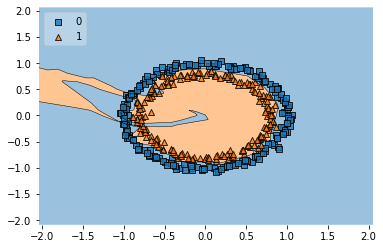

In [57]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model2,legend=2)

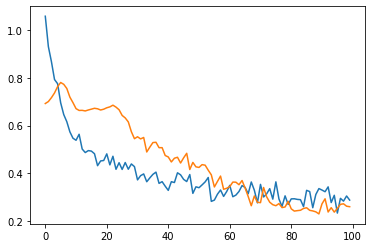

In [55]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

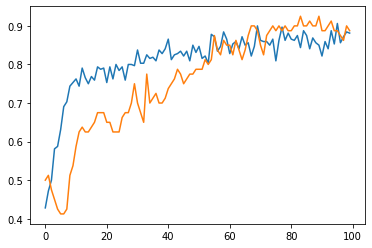

In [56]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

## **Blue curve is accuracy for model with batch_normalization and green is for the model without batch_normalization and here we can see that blue line grow faster it means after applying batch normalization it converge faster**

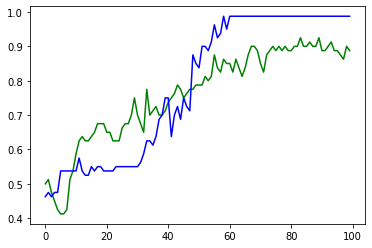

In [58]:
plt.plot(history2.history['val_accuracy'],color='g')
plt.plot(history1.history['val_accuracy'],color='b')